## Projeto: Análise Exploratória de dados de Vendas com Python e Pandas

*Disclaimer: Elaborado a partir do Lab "Análise de Dados com Python e Pandas" da [Digital Innovation One](https://www.dio.me/).*

Você é um analista de dados e recebeu os relatórios de vendas da empresa Adventure Lifetime S.A, uma empresa que é uma das suas novas clientes. Como é a primeira vez que ela está na alçada dos seus serviços de consultoria, você decidiu reunir informações básicas antes de iniciar análises mais avançadas, as perguntas a serem respondidas são:


1 - Qual a receita total?

2 - Qual o custo total do período?

3 - Qual o lucro operacional do período?

4 - Qual a média de tempo de envio de cada marca?

5 - Qual o lucro operacional por ano e por marca?

6 - Qual o total de produtos vendidos? Elabore um gráfico para melhor visualização.

7 - Qual foi o comportamento do lucro operacional por mês em 2009?

8 - Há valores outlier nos tempos de entrega? Identifique-os.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Estilo do matplotlib e exibindo as saídas no próprio Jupyter Notebook
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Carregando o arquivo
df = pd.read_excel("AdventureWorks.xlsx")

In [3]:
# Visualização geral - enxergando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
# Ver quantidades de linhas e colunas
df.shape

(904, 16)

In [5]:
# Verificando quais os tipos dos dados em questão
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

Questão 1 - Qual a receita total do período?

In [6]:
round(df["Valor Venda"].sum(),2)

5984606.14

*A receita total do período foi R$ 5.984.606,14*

**Questão 2 - Qual foi o custo total do período?**

In [7]:
# Criando a coluna custo da venda
df["CustoVenda"] = df["Custo Unitário"] * df["Quantidade"]

In [8]:
# Verificando a coluna criada
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoVenda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [9]:
# Somando os custos da venda
df["CustoVenda"].sum()

2486783.05

*Portanto, o custo total das vendas foi de R$ 2.486.783,05*

**Questão 3 - Qual o lucro operecional do período?**

O Lucro Operacional, em contabilidade, consiste na diferença entre a receita total e os custos operacionais.

In [10]:
# Criando a coluna Lucro da Operação
df["LucroOp"] = df["Valor Venda"] - df["CustoVenda"]

In [11]:
# Verificando a criação da coluna
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoVenda,LucroOp
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [12]:
round(df['LucroOp'].sum(),2)

3497823.09

*O lucro operacional de todas as vendas foi de 3.497.823,09*

**Questão 4 - Qual a média de tempo de envio para cada marca?**

Para isso, será necessário primeiro criar uma coluna com o tempo de entrega dos produtos

In [13]:
# Como já foi verificando que Data Venda e Data Envio são colunas tipo datetime, vamos direto para o código
# O resultado será em dias
df['TempoEntrega'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [14]:
# Verificando a criação da coluna Tempo Entrega
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoVenda,LucroOp,TempoEntrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


Agora, será calculada a média por marca:

In [15]:
round(df.groupby("Marca")["TempoEntrega"].mean(),2).reset_index()

,Marca,TempoEntrega
0,Adventure Works,8.66
1,Contoso,8.47
2,Fabrikam,8.51


*A Contoso é a marca que apresenta o menor tempo médio para entrega.*

**Questão 5 - Qual o lucro operacional por ano e por marca?**

In [16]:
# Criando uma coluna para o ano
df["AnoVenda"] = df["Data Venda"].dt.year

In [17]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoVenda,LucroOp,TempoEntrega,AnoVenda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20,2008
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5,2008


In [18]:
round(df.groupby(["AnoVenda", "Marca"])["LucroOp"].sum(),2).reset_index()

,AnoVenda,Marca,LucroOp
0,2008,Adventure Works,306641.16
1,2008,Contoso,56416.00
2,2008,Fabrikam,1557020.55
3,2009,Adventure Works,405395.08
4,2009,Contoso,138258.95
5,2009,Fabrikam,1034091.35


*O segmento mais lucrativo foram os produtor da Fabrikam em 2008, seguido pela própria Fabrikam em 2009. O segmento menos lucrativo foram os produtos da Contoso em 2008.*

**Questão 6 - Qual o total de produtos vendidos? Elabore um gráfico para melhor visualização.**

In [19]:
df.groupby("Produto")['Quantidade'].sum().sort_values(ascending = False)                                                           

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Criando um gráfico para os resultados acima

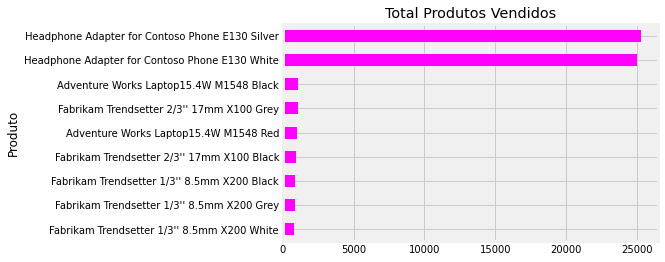

In [20]:
df.groupby("Produto")['Quantidade'].sum().sort_values(ascending = True).plot.barh(title = "Total Produtos Vendidos", color = "magenta")


*O Headphone Adapter for Contoso Phone E130 é o produto mais vendido, tanto na versão prata quanto branca.*

**Questão 7 - Qual foi o comportamento do lucro operacional por mês em 2009?**

In [21]:
df_2009 = df[df["AnoVenda"] == 2009]

In [22]:
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoVenda,LucroOp,TempoEntrega,AnoVenda
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12,2009
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,11,2009


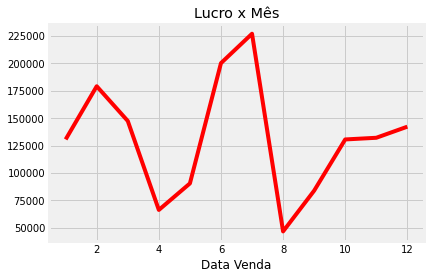

In [23]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["LucroOp"].sum().plot(title = "Lucro x Mês", color = "red")

*O gráfico mostra que os meses 6 e 7 (junho e julho) foram os de maior lucro, enquanto os meses 4 e 8 (abril e agosto) foram os de menor lucro.*

**Questão 8 - Há valores outlier nos tempos de entrega? Identifique-os.**

Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da 
normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

In [25]:
# Primeiro, vamos entender como os dados se comportam nos seus percentis
df['TempoEntrega'].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: TempoEntrega, dtype: float64

*Existe um valor máximo de 20, bem acima da média de 8.54, vamos trabalhar em cima dessa possibilidade e elaborar gráficos.*

{'boxes': [<matplotlib.lines.Line2D at 0x7fc83a8fea50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc83a7578d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc83a82d650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc83a75d3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc83ab3b1d0>,
  <matplotlib.lines.Line2D at 0x7fc83a757390>]}

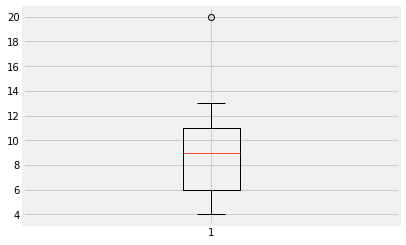

In [27]:
# Gráfico de boxplot
plt.boxplot(df['TempoEntrega'])

*O pontinho em cima se trata do outlier de 20 que citamos anteriormente.*

Vamos elaborar um histograma para melhor visualização

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

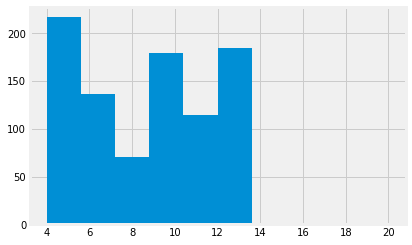

In [32]:
from numpy.core.fromnumeric import size
plt.hist(df['TempoEntrega'])

In [34]:
# Identificando o outlier
df[df['TempoEntrega'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoVenda,LucroOp,TempoEntrega,AnoVenda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20,2008


*O registro que contém o outlier é o de índice 0, enviado em 29 de maio de 2008.*

Muito obrigado por ter apreciado meu projeto!

Fique à vontade para conferir outros projetos no meu [GitHub](https://github.com/gbrmarcos) ou visitar meu perfil no [LinkedIn](https://www.linkedin.com/in/gbrmarcos/).

Um grande abraço!